In [65]:
from scipy.spatial.distance import cdist
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [25]:
def normalize(prices):
    returns = prices[:-1].values / prices[1:] - 1
    returns = returns - returns.mean()
    returns = returns / returns.std()
    return returns

In [62]:
stocks_main_industry = ['XPO', 'JBHT', 'UPS', 'CHRW', 'EXPD', 'FDX']
stocks_related_industry = ['XOM', 'CVX', 'PSX', 'OXY', 'VLO']
period_start = '2017-01-01'
period_end = '2018-01-01'
main_industry = pdr.get_data_yahoo(stocks_main_industry, period_start, period_end)
related_industry = pdr.get_data_yahoo(stocks_related_industry, period_start, period_end)

[*********************100%***********************]  6 of 6 downloaded
[*********************100%***********************]  5 of 5 downloaded


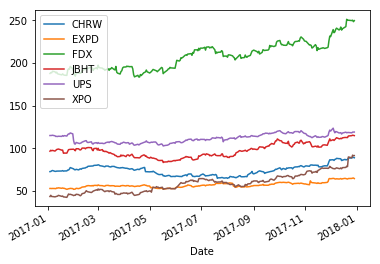

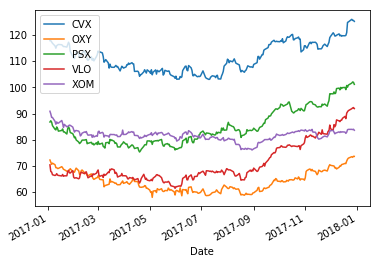

In [71]:
main_industry.Close.plot()
plt.show()
related_industry.Close.plot()
plt.show()

In [75]:
returns_main = np.matrix([normalize(main_industry['Adj Close'][ticker]) for ticker in stocks_main_industry])
returns_related = np.matrix([normalize(related_industry['Adj Close'][ticker]) for ticker in stocks_related_industry])

In [80]:
sum_of_squared_deviations = lambda a, b: np.sum((a - b)**2)
kernel_main = cdist(returns_main, returns_main, metric=sum_of_squared_deviations)
kernel_related = cdist(returns_main, returns_related, metric=sum_of_squared_deviations)
print(np.unravel_index((kernel_main + 1000 * np.eye(*kernel_main.shape)).argmin(), kernel_main.shape), \
      np.min(kernel_main + 1000 * np.eye(*kernel_main.shape)))
print(np.unravel_index(kernel_related.argmin(), kernel_related.shape), \
      np.min(kernel_related))


(2, 5) 154.824483088153
(1, 2) 329.1372630057997


Thus our pairs are:
- United Parcel Services, Inc. (UPS) and FedEx Corporation (FDX) \[same industry\] and
- J.B. Hunt Transport Services, Inc. (JBHT) and The Phillips 66 Company (PSX) \[different industries]

In [77]:
distances_main = pd.DataFrame(data=kernel_main, \
                              index=stocks_main_industry, \
                              columns=stocks_main_industry)
print(distances_main)

             XPO        JBHT         UPS        CHRW        EXPD         FDX
XPO     0.000000  272.510301  337.201400  361.272571  320.532015  268.253086
JBHT  272.510301    0.000000  252.013047  285.719193  297.027668  235.007728
UPS   337.201400  252.013047    0.000000  308.291234  265.725440  154.824483
CHRW  361.272571  285.719193  308.291234    0.000000  275.298079  306.712118
EXPD  320.532015  297.027668  265.725440  275.298079    0.000000  265.665640
FDX   268.253086  235.007728  154.824483  306.712118  265.665640    0.000000


In [81]:
distances_different = pd.DataFrame(data=kernel_related, \
                              index=stocks_main_industry, \
                              columns=stocks_related_industry)
print(distances_different)

             XOM         CVX         PSX         OXY         VLO
XPO   440.145541  462.542031  360.148348  462.469376  369.035950
JBHT  406.085835  439.398044  329.137263  441.789252  377.935697
UPS   360.800272  417.403054  353.320294  423.006715  345.993416
CHRW  381.040839  417.756611  363.253220  399.316208  369.242159
EXPD  413.083532  458.095397  353.555519  427.665960  385.249450
FDX   387.587599  426.414601  341.395460  427.170246  359.387134
